# Selección de caracteristicas
---
En este notebook se realizara el estudio para eliminar y seleccionar las caracteristicas, que seran las entradas el modelo de machine learning.
Importemos las librerias necesarias

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

Cargamos los datos

In [2]:
#Carga de datos
# ruta de los datos
ruta_train=r"../../../data/train.csv"
# cargando los datos 
df_train = pd.read_csv(ruta_train)

Importamos el paquete creado para el preprocesmaiento 

In [3]:
# llamamos el paquete
import sys
# colocamos la ruta del paquete a python 
sys.path.append('../../src/nombre_paquete/')

In [4]:
from preprocessing.funcion_de_preprocesamiento import preprocesamiento

In [5]:
df_train_prep = preprocesamiento(df_train)

Podemos ver los datos preprocesados 

In [6]:
df_train_prep.head(5)

,ID,Edad,Tipo_Trabajo,Estado_Civil,Educacion,mora,Vivienda,Consumo,Contacto,Mes,...,Campana,Dias_Ultima_Camp,No_Contactos,Resultado_Anterior,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,1,57,servicios,casado,bachillerato,unknown,no,no,telefono fijo,may,...,1,1,0,sin contacto,1.1,93.994,-36.4,4.857,5191.0,0
1,2,37,servicios,casado,bachillerato,no,si,no,telefono fijo,may,...,1,1,0,sin contacto,1.1,93.994,-36.4,4.857,5191.0,0
2,3,40,administrador negocio,casado,primaria,no,no,no,telefono fijo,may,...,1,1,0,sin contacto,1.1,93.994,-36.4,4.857,5191.0,0
3,4,56,servicios,casado,bachillerato,no,no,si,telefono fijo,may,...,1,1,0,sin contacto,1.1,93.994,-36.4,4.857,5191.0,0
4,7,25,servicios,soltero,bachillerato,no,si,no,telefono fijo,may,...,1,1,0,sin contacto,1.1,93.994,-36.4,4.857,5191.0,0


Veamos sus estadisticas

In [7]:
df_train_prep.describe()

,ID,Edad,Campana,Dias_Ultima_Camp,No_Contactos,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000
mean,16420.136499,40.067665,2.560154,0.963721,0.171003,0.095649,93.581585,-40.485237,3.634160,5167.329439,0.112126
std,9521.074915,10.449983,2.756954,0.186987,0.494079,1.565650,0.577424,4.629643,1.731184,72.260805,0.315528
min,1.000000,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,8158.000000,32.000000,1.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,16375.000000,38.000000,2.000000,1.000000,0.000000,1.100000,93.876000,-41.800000,4.857000,5191.000000,0.000000
75%,24644.500000,47.000000,3.000000,1.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,32967.000000,95.000000,42.000000,1.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Ahora veamos la correlación de los datos numericos 

In [8]:
correlaciones=df_train.drop(columns="ID").corr(numeric_only=True)
correlaciones

,Edad,Campana,Dias_Ultima_Camp,No_Contactos,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
Edad,1.000000,0.003292,-0.039372,0.022755,-0.002260,-0.021182,0.127901,0.003888,-0.028430,0.035514
Campana,0.003292,1.000000,0.052289,-0.079160,0.151806,0.076625,-0.012337,0.115184,0.144246,-0.068870
Dias_Ultima_Camp,-0.039372,0.052289,1.000000,-0.584283,0.267279,-0.038704,-0.081314,0.262478,0.371472,-0.319981
No_Contactos,0.022755,-0.079160,-0.584283,1.000000,-0.417668,-0.023331,-0.057095,-0.389524,-0.505163,0.228306
emp_var_rate,-0.002260,0.151806,0.267279,-0.417668,1.000000,0.055136,0.200584,0.805526,0.905766,-0.298051
cons_price_idx,-0.021182,0.076625,-0.038704,-0.023331,0.055136,1.000000,0.101182,0.007296,-0.108951,0.056309
cons_conf_idx,0.127901,-0.012337,-0.081314,-0.057095,0.200584,0.101182,1.000000,0.194689,0.105546,0.055895
euribor3m,0.003888,0.115184,0.262478,-0.389524,0.805526,0.007296,0.194689,1.000000,0.789987,-0.271372
nr_employed,-0.028430,0.144246,0.371472,-0.505163,0.905766,-0.108951,0.105546,0.789987,1.000000,-0.354954
y,0.035514,-0.068870,-0.319981,0.228306,-0.298051,0.056309,0.055895,-0.271372,-0.354954,1.000000


Grafiquemos la matriz de correlacion en un mapa de calor

<function matplotlib.pyplot.show(close=None, block=None)>

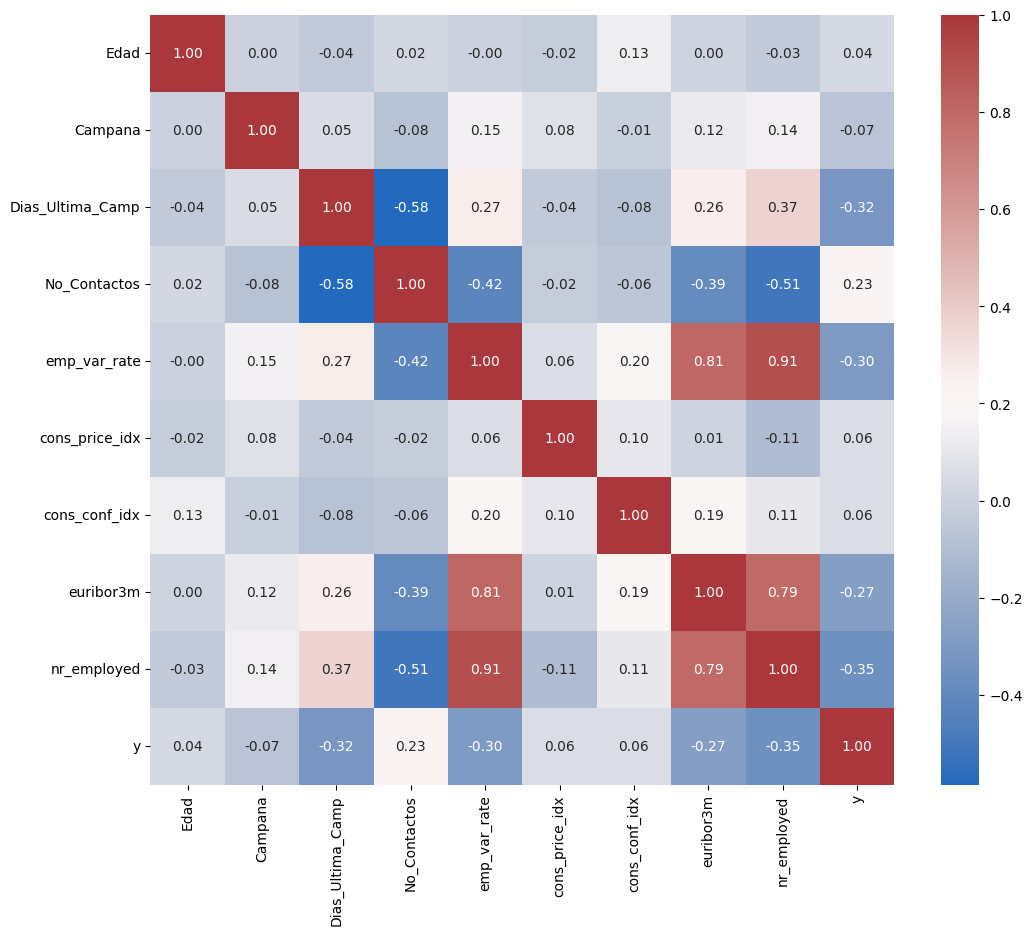

In [9]:
plt.subplots(figsize=(12,10))  
sns.heatmap(correlaciones, cmap = "vlag",annot = True,fmt=".2f")
plt.show

Del mapa de calor se puede observar que hay tres caracteristicas que estan fuertemente correlacionadas, las cuales son
* emp_var_rate
* euribor3m
* nr_exployed

Estas caracteristicas tienen que ver con las variables economicas globales, por esto presentan un alto grado de correlación.

veamos algunas graficas de correlación:

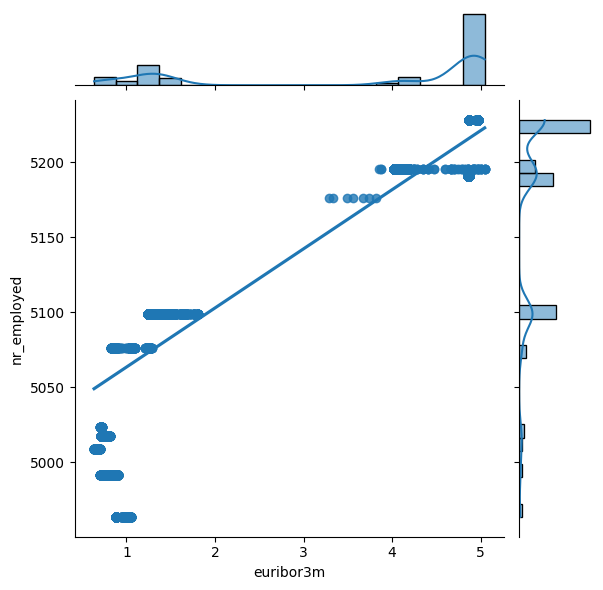

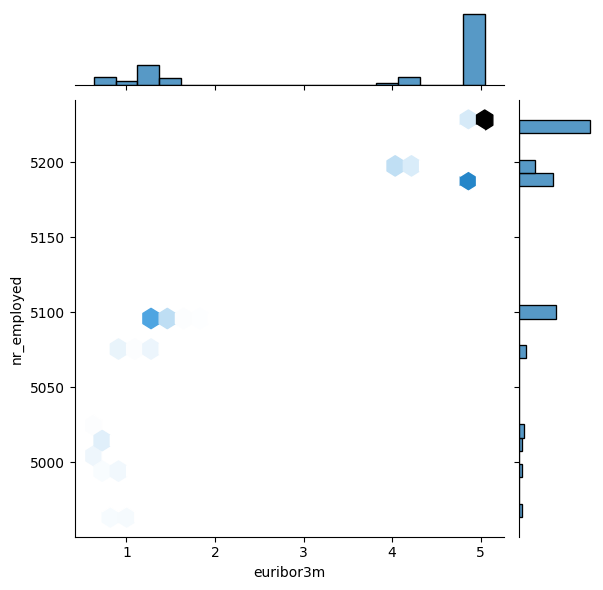

In [10]:
sns.jointplot(data=df_train_prep, x="euribor3m", y="nr_employed",kind="reg");
sns.jointplot(data=df_train_prep, x="euribor3m", y="nr_employed",kind="hex");

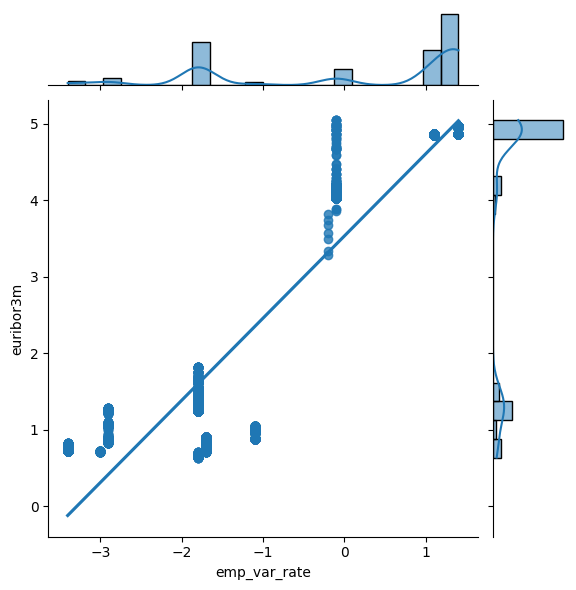

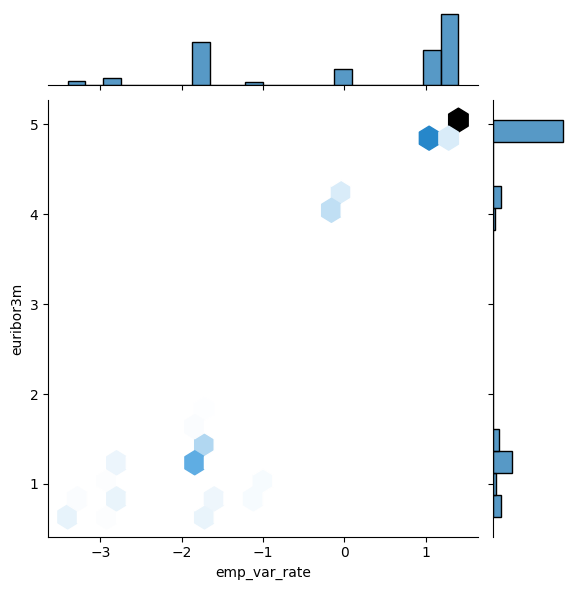

In [11]:
sns.jointplot(data=df_train_prep, x="emp_var_rate", y="euribor3m",kind="reg");
sns.jointplot(data=df_train_prep, x="emp_var_rate", y="euribor3m",kind="hex");

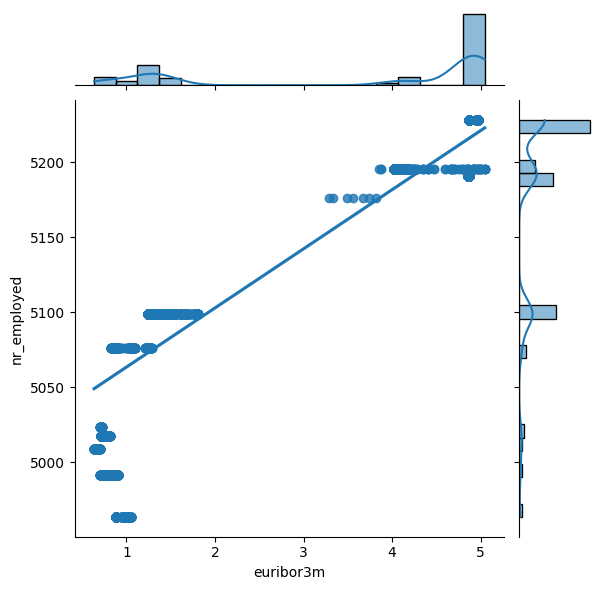

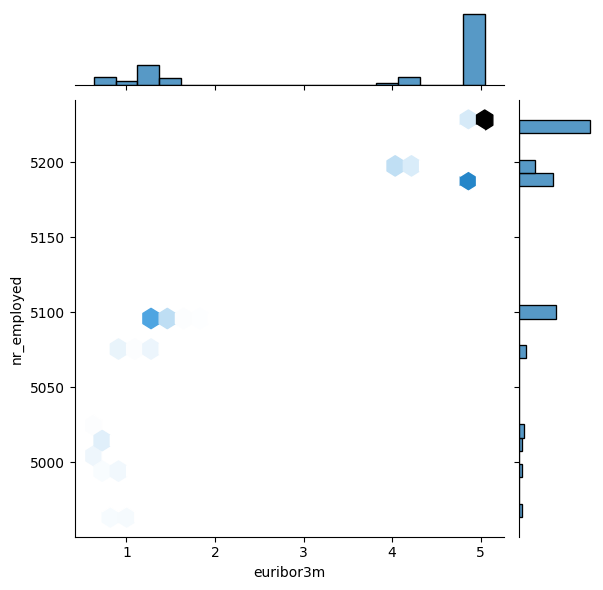

In [12]:
sns.jointplot(data=df_train_prep, x="euribor3m", y="nr_employed",kind="reg");
sns.jointplot(data=df_train_prep, x="euribor3m", y="nr_employed",kind="hex");

Una de las cosas interesantes que muestras los graficos de correlaciones, especialmente el de densidad kind="hex", es que los dayos se acumulan en algunas zonas, esto se debe a la variación de las variables economicas dentro de un rango. 

Teniendo en cuenta las correlaciones se pueden eliminar dos y dejar una de las tres como caracteristicas principal, otra forma es realizar el PCA para no perder ni un poco de información, aqui se realizara el PCA. 

Veamos su PCA a una dimensión:

In [13]:
pca=PCA(n_components=1)
caract_corr=["emp_var_rate","euribor3m","nr_employed"]
x=df_train_prep[caract_corr]
pca.fit(x)

PCA(n_components=1)

In [14]:
print("Proporción de varianza explicada\n",pca.explained_variance_ratio_)


Proporción de varianza explicada
 [0.99985395]


Vemos que la in formación de la varianza explicada es de 99%, por tanto, no perdemos información por lo menos de la variacion de los datos.

Este proceso se llevara a cabo en un script.py sobre los datos, que se encuentra en **src/nombre_paquete/preprocessing
/seleccion_caracteristicas.py**


